<div >
<h1 style="text-align: center;font-size: 100px;font-weight:2000;color:Blue;font-style: oblique;"> LetsGrowMore</h1>   

<h1 style="text-align: center;font-size: 70px;color:Blue;font-style: oblique;">Beginner - Task2</h1>
</div>




# Name - K.V.L.Amrutha
# Data Science
### Problem statement –Stock Market Prediction And Forecasting Using Stacked LSTM
### Dataset:https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


### Let's start by importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#import dataset
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
df.shape

(2035, 8)

In [6]:
#checking for null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df1=df.reset_index()['Turnover (Lacs)']

In [9]:
df1

0        7162.35
1       11859.95
2        5248.60
3        5503.90
4        7999.55
          ...   
2030      694.98
2031      780.01
2032      340.31
2033      355.17
2034      803.56
Name: Turnover (Lacs), Length: 2035, dtype: float64

In [10]:
df1.shape

(2035,)

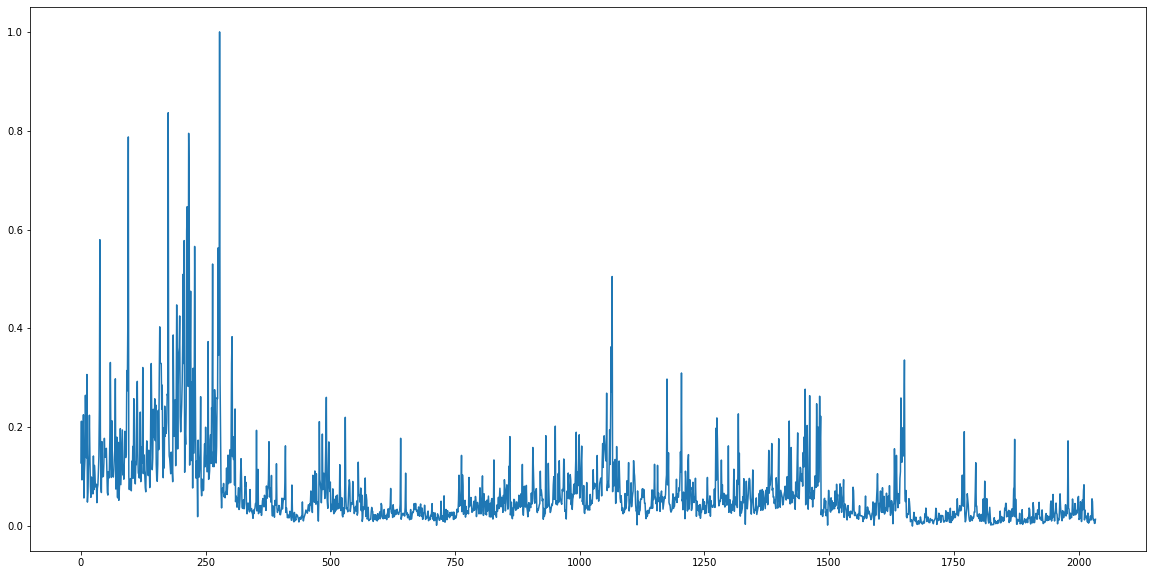

In [48]:
plt.figure(figsize=(20,10))
plt.plot(df1);

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(2035, 1)

In [14]:
df1

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.00544294],
       [0.00570964],
       [0.01375712]])

In [15]:
training_size=int(len(df1)*0.65)

In [16]:
training_size

1322

In [17]:
test_size=len(df1)-training_size

In [18]:
test_size

713

In [19]:
train_data,test_data=df1[0:training_size,:],df1[training_size:,:]

In [20]:
train_data

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.08436962],
       [0.14742281],
       [0.03451647]])

In [21]:
test_data

array([[0.02023761],
       [0.04964783],
       [0.02641478],
       [0.03155926],
       [0.03600234],
       [0.05942474],
       [0.04719154],
       [0.095914  ],
       [0.05333766],
       [0.05120999],
       [0.00366273],
       [0.04540343],
       [0.09079519],
       [0.04583255],
       [0.0349639 ],
       [0.04946118],
       [0.06568501],
       [0.09006275],
       [0.09653929],
       [0.09308206],
       [0.05614268],
       [0.04956115],
       [0.02418911],
       [0.05041491],
       [0.07186918],
       [0.11361545],
       [0.04857744],
       [0.03241625],
       [0.02596717],
       [0.03227931],
       [0.03195554],
       [0.04123189],
       [0.05701959],
       [0.02351734],
       [0.02938671],
       [0.03550448],
       [0.03992118],
       [0.04242055],
       [0.06631838],
       [0.03988995],
       [0.07261077],
       [0.03174896],
       [0.06290368],
       [0.06034401],
       [0.07395558],
       [0.03225616],
       [0.07064785],
       [0.061

In [22]:
def create_dataset(dataset,time_step=1):
    x,y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(x),np.array(y)

In [23]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [24]:
print(x_train)

[[0.12788156 0.21219178 0.09353452 ... 0.07394607 0.09465444 0.08905249]
 [0.21219178 0.09353452 0.09811652 ... 0.09465444 0.08905249 0.09602671]
 [0.09353452 0.09811652 0.14290722 ... 0.08905249 0.09602671 0.07137832]
 ...
 [0.14465207 0.0343431  0.04570584 ... 0.09286615 0.03750419 0.10034901]
 [0.0343431  0.04570584 0.09361151 ... 0.03750419 0.10034901 0.22708193]
 [0.04570584 0.09361151 0.0740595  ... 0.10034901 0.22708193 0.08436962]]


In [25]:
x_train.shape

(1221, 100)

In [26]:
x_test.shape

(612, 100)

In [27]:
y_train.shape

(1221,)

In [28]:
y_test.shape

(612,)

In [29]:
#Reshape into which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [30]:
x_train

array([[[0.12788156],
        [0.21219178],
        [0.09353452],
        ...,
        [0.07394607],
        [0.09465444],
        [0.08905249]],

       [[0.21219178],
        [0.09353452],
        [0.09811652],
        ...,
        [0.09465444],
        [0.08905249],
        [0.09602671]],

       [[0.09353452],
        [0.09811652],
        [0.14290722],
        ...,
        [0.08905249],
        [0.09602671],
        [0.07137832]],

       ...,

       [[0.14465207],
        [0.0343431 ],
        [0.04570584],
        ...,
        [0.09286615],
        [0.03750419],
        [0.10034901]],

       [[0.0343431 ],
        [0.04570584],
        [0.09361151],
        ...,
        [0.03750419],
        [0.10034901],
        [0.22708193]],

       [[0.04570584],
        [0.09361151],
        [0.0740595 ],
        ...,
        [0.10034901],
        [0.22708193],
        [0.08436962]]])

## Create LSTM Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
#adding layers
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Train the model


In [34]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 8s 400ms/step - loss: 0.0071 - val_loss: 0.0016
Epoch 2/100
20/20 [==============================] - 5s 269ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 5s 265ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 4/100
20/20 [==============================] - 5s 253ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 5/100
20/20 [==============================] - 5s 251ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 5s 251ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 7/100
20/20 [==============================] - 5s 252ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 5s 251ms/step - loss: 0.0048 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 5s 249ms/step - loss: 0.0058 - val_loss: 0.0025
Epoch 10/100
20/20 [==============================] - 5s 250ms/step - loss: 0.0050 - val_lo

20/20 [==============================] - 5s 257ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 82/100
20/20 [==============================] - 5s 256ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 83/100
20/20 [==============================] - 5s 254ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 84/100
20/20 [==============================] - 5s 255ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 85/100
20/20 [==============================] - 5s 255ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 86/100
20/20 [==============================] - 5s 257ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 87/100
20/20 [==============================] - 5s 254ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 88/100
20/20 [==============================] - 5s 255ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 89/100
20/20 [==============================] - 5s 256ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 90/100
20/20 [==============================] - 5s 255ms/step - loss: 0.0039 - val_loss: 

## Making Predictions

In [35]:
import tensorflow as tf

In [36]:
train_pred= model.predict(x_train)
test_pred= model.predict(x_test)

In [37]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

5438.766009309198

In [39]:
math.sqrt(mean_squared_error(y_test,test_pred))

2774.4957281134316

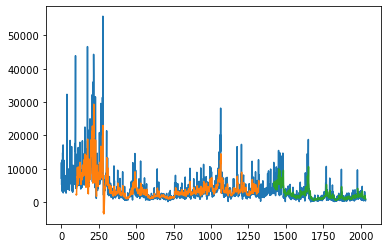

In [40]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_pred) + look_back, :] = train_pred


testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_pred) + (look_back * 2)+1:len(df1) - 1, :] = test_pred


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data), x_test.shape

(713, (612, 100, 1))

In [42]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 506)

In [43]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

## Predicting for next 30 days

In [44]:
lst_output=[]
n_steps=505
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.01769463 0.0425067  0.04461822 0.04017927 0.03182004 0.01793836
 0.01238845 0.0367355  0.04162943 0.02128646 0.02868891 0.01874294
 0.01736368 0.03018538 0.02653306 0.02948327 0.02455076 0.03199718
 0.07869749 0.07127709 0.03269839 0.02129005 0.0280385  0.02504952
 0.0218816  0.01987058 0.01535158 0.01759663 0.02437541 0.01375102
 0.02650309 0.04115023 0.02174753 0.02090992 0.02044365 0.02102676
 0.0203864  0.01915968 0.00923022 0.01832153 0.0143108  0.01858321
 0.02960639 0.06082429 0.01661455 0.01540363 0.01728112 0.0386173
 0.03329281 0.0247629  0.03035731 0.02661131 0.0233323  0.01838758
 0.01301805 0.01594959 0.02554828 0.02776157 0.04895506 0.02078698
 0.00165207 0.01544742 0.04653394 0.02132415 0.02362951 0.05231824
 0.07397802 0.1059996  0.0526666  0.02200149 0.01415664 0.04604146
 0.04689917 0.07094435 0.03079775 0.02783766 0.02981727 0.07759318
 0.02777323 0.03132989 0.06019882 0.02436715 0.02751568 0.03658366
 0.03202015 0.06661164 0.03560516 0.02966436 0.0381

2 day input [0.04461822 0.04017927 0.03182004 0.01793836 0.01238845 0.0367355
 0.04162943 0.02128646 0.02868891 0.01874294 0.01736368 0.03018538
 0.02653306 0.02948327 0.02455076 0.03199718 0.07869749 0.07127709
 0.03269839 0.02129005 0.0280385  0.02504952 0.0218816  0.01987058
 0.01535158 0.01759663 0.02437541 0.01375102 0.02650309 0.04115023
 0.02174753 0.02090992 0.02044365 0.02102676 0.0203864  0.01915968
 0.00923022 0.01832153 0.0143108  0.01858321 0.02960639 0.06082429
 0.01661455 0.01540363 0.01728112 0.0386173  0.03329281 0.0247629
 0.03035731 0.02661131 0.0233323  0.01838758 0.01301805 0.01594959
 0.02554828 0.02776157 0.04895506 0.02078698 0.00165207 0.01544742
 0.04653394 0.02132415 0.02362951 0.05231824 0.07397802 0.1059996
 0.0526666  0.02200149 0.01415664 0.04604146 0.04689917 0.07094435
 0.03079775 0.02783766 0.02981727 0.07759318 0.02777323 0.03132989
 0.06019882 0.02436715 0.02751568 0.03658366 0.03202015 0.06661164
 0.03560516 0.02966436 0.03810723 0.06112455 0.039667

3 day output [[0.01726948]]
4 day input [0.03182004 0.01793836 0.01238845 0.0367355  0.04162943 0.02128646
 0.02868891 0.01874294 0.01736368 0.03018538 0.02653306 0.02948327
 0.02455076 0.03199718 0.07869749 0.07127709 0.03269839 0.02129005
 0.0280385  0.02504952 0.0218816  0.01987058 0.01535158 0.01759663
 0.02437541 0.01375102 0.02650309 0.04115023 0.02174753 0.02090992
 0.02044365 0.02102676 0.0203864  0.01915968 0.00923022 0.01832153
 0.0143108  0.01858321 0.02960639 0.06082429 0.01661455 0.01540363
 0.01728112 0.0386173  0.03329281 0.0247629  0.03035731 0.02661131
 0.0233323  0.01838758 0.01301805 0.01594959 0.02554828 0.02776157
 0.04895506 0.02078698 0.00165207 0.01544742 0.04653394 0.02132415
 0.02362951 0.05231824 0.07397802 0.1059996  0.0526666  0.02200149
 0.01415664 0.04604146 0.04689917 0.07094435 0.03079775 0.02783766
 0.02981727 0.07759318 0.02777323 0.03132989 0.06019882 0.02436715
 0.02751568 0.03658366 0.03202015 0.06661164 0.03560516 0.02966436
 0.03810723 0.06112455

6 day output [[0.02134921]]
7 day input [0.0367355  0.04162943 0.02128646 0.02868891 0.01874294 0.01736368
 0.03018538 0.02653306 0.02948327 0.02455076 0.03199718 0.07869749
 0.07127709 0.03269839 0.02129005 0.0280385  0.02504952 0.0218816
 0.01987058 0.01535158 0.01759663 0.02437541 0.01375102 0.02650309
 0.04115023 0.02174753 0.02090992 0.02044365 0.02102676 0.0203864
 0.01915968 0.00923022 0.01832153 0.0143108  0.01858321 0.02960639
 0.06082429 0.01661455 0.01540363 0.01728112 0.0386173  0.03329281
 0.0247629  0.03035731 0.02661131 0.0233323  0.01838758 0.01301805
 0.01594959 0.02554828 0.02776157 0.04895506 0.02078698 0.00165207
 0.01544742 0.04653394 0.02132415 0.02362951 0.05231824 0.07397802
 0.1059996  0.0526666  0.02200149 0.01415664 0.04604146 0.04689917
 0.07094435 0.03079775 0.02783766 0.02981727 0.07759318 0.02777323
 0.03132989 0.06019882 0.02436715 0.02751568 0.03658366 0.03202015
 0.06661164 0.03560516 0.02966436 0.03810723 0.06112455 0.0396674
 0.08185302 0.04144295 0.

8 day output [[0.022201]]
9 day input [0.02128646 0.02868891 0.01874294 0.01736368 0.03018538 0.02653306
 0.02948327 0.02455076 0.03199718 0.07869749 0.07127709 0.03269839
 0.02129005 0.0280385  0.02504952 0.0218816  0.01987058 0.01535158
 0.01759663 0.02437541 0.01375102 0.02650309 0.04115023 0.02174753
 0.02090992 0.02044365 0.02102676 0.0203864  0.01915968 0.00923022
 0.01832153 0.0143108  0.01858321 0.02960639 0.06082429 0.01661455
 0.01540363 0.01728112 0.0386173  0.03329281 0.0247629  0.03035731
 0.02661131 0.0233323  0.01838758 0.01301805 0.01594959 0.02554828
 0.02776157 0.04895506 0.02078698 0.00165207 0.01544742 0.04653394
 0.02132415 0.02362951 0.05231824 0.07397802 0.1059996  0.0526666
 0.02200149 0.01415664 0.04604146 0.04689917 0.07094435 0.03079775
 0.02783766 0.02981727 0.07759318 0.02777323 0.03132989 0.06019882
 0.02436715 0.02751568 0.03658366 0.03202015 0.06661164 0.03560516
 0.02966436 0.03810723 0.06112455 0.0396674  0.08185302 0.04144295
 0.02175489 0.02674197 0.

11 day output [[0.02146697]]
12 day input [0.01736368 0.03018538 0.02653306 0.02948327 0.02455076 0.03199718
 0.07869749 0.07127709 0.03269839 0.02129005 0.0280385  0.02504952
 0.0218816  0.01987058 0.01535158 0.01759663 0.02437541 0.01375102
 0.02650309 0.04115023 0.02174753 0.02090992 0.02044365 0.02102676
 0.0203864  0.01915968 0.00923022 0.01832153 0.0143108  0.01858321
 0.02960639 0.06082429 0.01661455 0.01540363 0.01728112 0.0386173
 0.03329281 0.0247629  0.03035731 0.02661131 0.0233323  0.01838758
 0.01301805 0.01594959 0.02554828 0.02776157 0.04895506 0.02078698
 0.00165207 0.01544742 0.04653394 0.02132415 0.02362951 0.05231824
 0.07397802 0.1059996  0.0526666  0.02200149 0.01415664 0.04604146
 0.04689917 0.07094435 0.03079775 0.02783766 0.02981727 0.07759318
 0.02777323 0.03132989 0.06019882 0.02436715 0.02751568 0.03658366
 0.03202015 0.06661164 0.03560516 0.02966436 0.03810723 0.06112455
 0.0396674  0.08185302 0.04144295 0.02175489 0.02674197 0.05154453
 0.04870236 0.03348  

13 day output [[0.02101258]]
14 day input [0.02653306 0.02948327 0.02455076 0.03199718 0.07869749 0.07127709
 0.03269839 0.02129005 0.0280385  0.02504952 0.0218816  0.01987058
 0.01535158 0.01759663 0.02437541 0.01375102 0.02650309 0.04115023
 0.02174753 0.02090992 0.02044365 0.02102676 0.0203864  0.01915968
 0.00923022 0.01832153 0.0143108  0.01858321 0.02960639 0.06082429
 0.01661455 0.01540363 0.01728112 0.0386173  0.03329281 0.0247629
 0.03035731 0.02661131 0.0233323  0.01838758 0.01301805 0.01594959
 0.02554828 0.02776157 0.04895506 0.02078698 0.00165207 0.01544742
 0.04653394 0.02132415 0.02362951 0.05231824 0.07397802 0.1059996
 0.0526666  0.02200149 0.01415664 0.04604146 0.04689917 0.07094435
 0.03079775 0.02783766 0.02981727 0.07759318 0.02777323 0.03132989
 0.06019882 0.02436715 0.02751568 0.03658366 0.03202015 0.06661164
 0.03560516 0.02966436 0.03810723 0.06112455 0.0396674  0.08185302
 0.04144295 0.02175489 0.02674197 0.05154453 0.04870236 0.03348
 0.00472199 0.04154669 0.

15 day output [[0.02132399]]
16 day input [0.02455076 0.03199718 0.07869749 0.07127709 0.03269839 0.02129005
 0.0280385  0.02504952 0.0218816  0.01987058 0.01535158 0.01759663
 0.02437541 0.01375102 0.02650309 0.04115023 0.02174753 0.02090992
 0.02044365 0.02102676 0.0203864  0.01915968 0.00923022 0.01832153
 0.0143108  0.01858321 0.02960639 0.06082429 0.01661455 0.01540363
 0.01728112 0.0386173  0.03329281 0.0247629  0.03035731 0.02661131
 0.0233323  0.01838758 0.01301805 0.01594959 0.02554828 0.02776157
 0.04895506 0.02078698 0.00165207 0.01544742 0.04653394 0.02132415
 0.02362951 0.05231824 0.07397802 0.1059996  0.0526666  0.02200149
 0.01415664 0.04604146 0.04689917 0.07094435 0.03079775 0.02783766
 0.02981727 0.07759318 0.02777323 0.03132989 0.06019882 0.02436715
 0.02751568 0.03658366 0.03202015 0.06661164 0.03560516 0.02966436
 0.03810723 0.06112455 0.0396674  0.08185302 0.04144295 0.02175489
 0.02674197 0.05154453 0.04870236 0.03348    0.00472199 0.04154669
 0.0474839  0.156490

18 day input [0.07869749 0.07127709 0.03269839 0.02129005 0.0280385  0.02504952
 0.0218816  0.01987058 0.01535158 0.01759663 0.02437541 0.01375102
 0.02650309 0.04115023 0.02174753 0.02090992 0.02044365 0.02102676
 0.0203864  0.01915968 0.00923022 0.01832153 0.0143108  0.01858321
 0.02960639 0.06082429 0.01661455 0.01540363 0.01728112 0.0386173
 0.03329281 0.0247629  0.03035731 0.02661131 0.0233323  0.01838758
 0.01301805 0.01594959 0.02554828 0.02776157 0.04895506 0.02078698
 0.00165207 0.01544742 0.04653394 0.02132415 0.02362951 0.05231824
 0.07397802 0.1059996  0.0526666  0.02200149 0.01415664 0.04604146
 0.04689917 0.07094435 0.03079775 0.02783766 0.02981727 0.07759318
 0.02777323 0.03132989 0.06019882 0.02436715 0.02751568 0.03658366
 0.03202015 0.06661164 0.03560516 0.02966436 0.03810723 0.06112455
 0.0396674  0.08185302 0.04144295 0.02175489 0.02674197 0.05154453
 0.04870236 0.03348    0.00472199 0.04154669 0.0474839  0.15649043
 0.07658489 0.03085715 0.05500373 0.14310661 0.074

19 day output [[0.02394173]]
20 day input [0.03269839 0.02129005 0.0280385  0.02504952 0.0218816  0.01987058
 0.01535158 0.01759663 0.02437541 0.01375102 0.02650309 0.04115023
 0.02174753 0.02090992 0.02044365 0.02102676 0.0203864  0.01915968
 0.00923022 0.01832153 0.0143108  0.01858321 0.02960639 0.06082429
 0.01661455 0.01540363 0.01728112 0.0386173  0.03329281 0.0247629
 0.03035731 0.02661131 0.0233323  0.01838758 0.01301805 0.01594959
 0.02554828 0.02776157 0.04895506 0.02078698 0.00165207 0.01544742
 0.04653394 0.02132415 0.02362951 0.05231824 0.07397802 0.1059996
 0.0526666  0.02200149 0.01415664 0.04604146 0.04689917 0.07094435
 0.03079775 0.02783766 0.02981727 0.07759318 0.02777323 0.03132989
 0.06019882 0.02436715 0.02751568 0.03658366 0.03202015 0.06661164
 0.03560516 0.02966436 0.03810723 0.06112455 0.0396674  0.08185302
 0.04144295 0.02175489 0.02674197 0.05154453 0.04870236 0.03348
 0.00472199 0.04154669 0.0474839  0.15649043 0.07658489 0.03085715
 0.05500373 0.14310661 0.

21 day output [[0.02544947]]
22 day input [0.0280385  0.02504952 0.0218816  0.01987058 0.01535158 0.01759663
 0.02437541 0.01375102 0.02650309 0.04115023 0.02174753 0.02090992
 0.02044365 0.02102676 0.0203864  0.01915968 0.00923022 0.01832153
 0.0143108  0.01858321 0.02960639 0.06082429 0.01661455 0.01540363
 0.01728112 0.0386173  0.03329281 0.0247629  0.03035731 0.02661131
 0.0233323  0.01838758 0.01301805 0.01594959 0.02554828 0.02776157
 0.04895506 0.02078698 0.00165207 0.01544742 0.04653394 0.02132415
 0.02362951 0.05231824 0.07397802 0.1059996  0.0526666  0.02200149
 0.01415664 0.04604146 0.04689917 0.07094435 0.03079775 0.02783766
 0.02981727 0.07759318 0.02777323 0.03132989 0.06019882 0.02436715
 0.02751568 0.03658366 0.03202015 0.06661164 0.03560516 0.02966436
 0.03810723 0.06112455 0.0396674  0.08185302 0.04144295 0.02175489
 0.02674197 0.05154453 0.04870236 0.03348    0.00472199 0.04154669
 0.0474839  0.15649043 0.07658489 0.03085715 0.05500373 0.14310661
 0.07433212 0.055045

23 day output [[0.02662778]]
24 day input [0.0218816  0.01987058 0.01535158 0.01759663 0.02437541 0.01375102
 0.02650309 0.04115023 0.02174753 0.02090992 0.02044365 0.02102676
 0.0203864  0.01915968 0.00923022 0.01832153 0.0143108  0.01858321
 0.02960639 0.06082429 0.01661455 0.01540363 0.01728112 0.0386173
 0.03329281 0.0247629  0.03035731 0.02661131 0.0233323  0.01838758
 0.01301805 0.01594959 0.02554828 0.02776157 0.04895506 0.02078698
 0.00165207 0.01544742 0.04653394 0.02132415 0.02362951 0.05231824
 0.07397802 0.1059996  0.0526666  0.02200149 0.01415664 0.04604146
 0.04689917 0.07094435 0.03079775 0.02783766 0.02981727 0.07759318
 0.02777323 0.03132989 0.06019882 0.02436715 0.02751568 0.03658366
 0.03202015 0.06661164 0.03560516 0.02966436 0.03810723 0.06112455
 0.0396674  0.08185302 0.04144295 0.02175489 0.02674197 0.05154453
 0.04870236 0.03348    0.00472199 0.04154669 0.0474839  0.15649043
 0.07658489 0.03085715 0.05500373 0.14310661 0.07433212 0.05504519
 0.03714039 0.065769 

25 day output [[0.02741511]]
26 day input [0.01535158 0.01759663 0.02437541 0.01375102 0.02650309 0.04115023
 0.02174753 0.02090992 0.02044365 0.02102676 0.0203864  0.01915968
 0.00923022 0.01832153 0.0143108  0.01858321 0.02960639 0.06082429
 0.01661455 0.01540363 0.01728112 0.0386173  0.03329281 0.0247629
 0.03035731 0.02661131 0.0233323  0.01838758 0.01301805 0.01594959
 0.02554828 0.02776157 0.04895506 0.02078698 0.00165207 0.01544742
 0.04653394 0.02132415 0.02362951 0.05231824 0.07397802 0.1059996
 0.0526666  0.02200149 0.01415664 0.04604146 0.04689917 0.07094435
 0.03079775 0.02783766 0.02981727 0.07759318 0.02777323 0.03132989
 0.06019882 0.02436715 0.02751568 0.03658366 0.03202015 0.06661164
 0.03560516 0.02966436 0.03810723 0.06112455 0.0396674  0.08185302
 0.04144295 0.02175489 0.02674197 0.05154453 0.04870236 0.03348
 0.00472199 0.04154669 0.0474839  0.15649043 0.07658489 0.03085715
 0.05500373 0.14310661 0.07433212 0.05504519 0.03714039 0.065769
 0.05307796 0.04581012 0.09

27 day output [[0.02797514]]
28 day input [0.02437541 0.01375102 0.02650309 0.04115023 0.02174753 0.02090992
 0.02044365 0.02102676 0.0203864  0.01915968 0.00923022 0.01832153
 0.0143108  0.01858321 0.02960639 0.06082429 0.01661455 0.01540363
 0.01728112 0.0386173  0.03329281 0.0247629  0.03035731 0.02661131
 0.0233323  0.01838758 0.01301805 0.01594959 0.02554828 0.02776157
 0.04895506 0.02078698 0.00165207 0.01544742 0.04653394 0.02132415
 0.02362951 0.05231824 0.07397802 0.1059996  0.0526666  0.02200149
 0.01415664 0.04604146 0.04689917 0.07094435 0.03079775 0.02783766
 0.02981727 0.07759318 0.02777323 0.03132989 0.06019882 0.02436715
 0.02751568 0.03658366 0.03202015 0.06661164 0.03560516 0.02966436
 0.03810723 0.06112455 0.0396674  0.08185302 0.04144295 0.02175489
 0.02674197 0.05154453 0.04870236 0.03348    0.00472199 0.04154669
 0.0474839  0.15649043 0.07658489 0.03085715 0.05500373 0.14310661
 0.07433212 0.05504519 0.03714039 0.065769   0.05307796 0.04581012
 0.09662831 0.110339

## Visualization

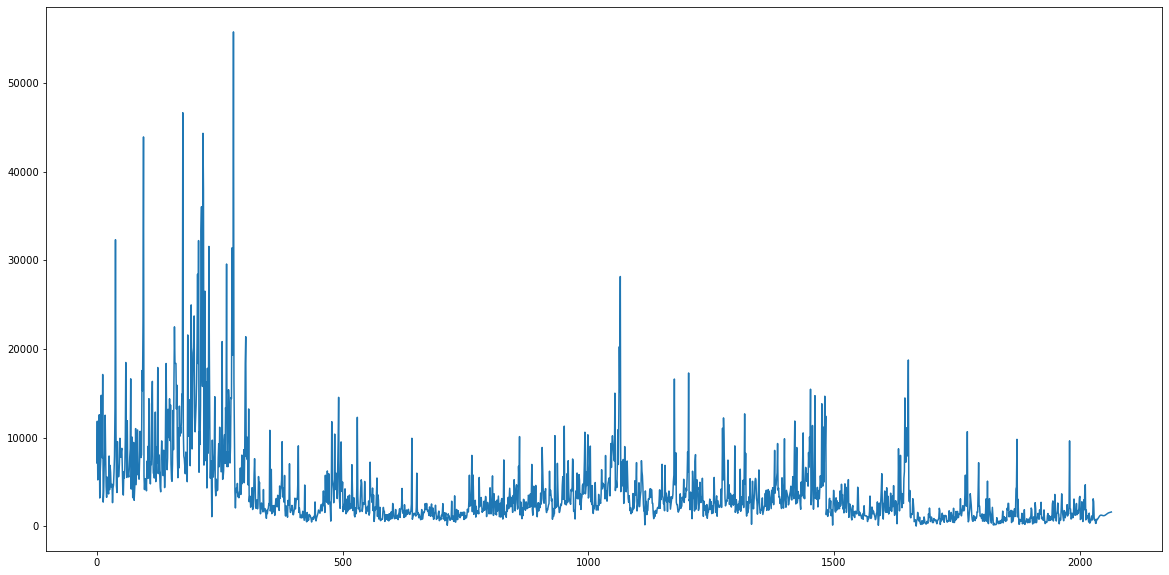

In [47]:
plt.figure(figsize=(20,10))
df = df1.tolist()
df.extend(lst_output)
df = scaler.inverse_transform(df).tolist()
plt.plot(df)

<img alt="Alt text" src="https://etiquettejulie.com/wp-content/uploads/2017/01/thank-you-from-christian-vision-alliance.jpg" height=800 width=800>